
**The dataset:** New York City Airbnb Open 


The dataset contains the following 16 features:

1. id: listing ID
2. name: name of the listing
3. host_id: host ID
4. host_name: name of the host
5. neighbourhood_group: location of the listing by neighbourhood (Manhattan, Brooklyn, Queens, Bronx, Staten Island)
6. neighbourhood: name of the neighbourhood
7. latitude: latitude coordinates
8. longitude: longitude coordinates
9. room_type: listing space type (Private room, Shared room, Entire home/apt)
10. price: price in dollars per night
11. minimum_nights: minimum number of nights a guest can stay
12. number_of_reviews: The number of reviews the listing has over the lifetime of the listing
13. last_review: date of the last review
14. reviews_per_month: number of reviews per month
15. calculated_host_listings_count: amount of listings per host
16. availability_365: number of days when listing is available for booking





In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('AB_NYC_2019.csv')



In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
# Printing first 10 rows to familiarize ourselves with the data
df[:10]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,2018-10-19,0.21,6.0,365.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,2019-05-21,0.38,2.0,355.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,NaN,NaN,1.0,365.0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,2019-07-05,4.64,1.0,194.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,2018-11-19,0.10,1.0,0.0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200.0,3.0,74.0,2019-06-22,0.59,1.0,129.0
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60.0,45.0,49.0,2017-10-05,0.40,1.0,0.0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79.0,2.0,430.0,2019-06-24,3.47,1.0,220.0
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79.0,2.0,118.0,2017-07-21,0.99,1.0,0.0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150.0,1.0,160.0,2019-06-09,1.33,4.0,188.0


In [4]:
print("\nSHAPE:")
print(df.shape)

# Check for missing values in the DataFrame
print('\nNumber of missing values per column:')
print(df.isnull().sum())




SHAPE:
(14884, 16)

Number of missing values per column:
id                                   0
name                                12
host_id                              0
host_name                           13
neighbourhood_group                  1
neighbourhood                        1
latitude                             1
longitude                            1
room_type                            1
price                                1
minimum_nights                       1
number_of_reviews                    1
last_review                       2456
reviews_per_month                 2456
calculated_host_listings_count       1
availability_365                     1
dtype: int64


In [5]:
categorical_features=np.array(["neighbourhood_group","neighbourhood","room_type"])
label="price"
numeric_features=np.array([column for column in df.columns \
                                   if column not in categorical_features and \
                                      column != label])

**Categorical features:**
*  neighbourhood 
*  neighbourhood_group
*  room_type

**Numeric features:**
*  id
*  host_id
*  latitude
*  longitude
*  minimum_nights
*  number_of_reviews
*  reviews_per_month  
*  calculated_host_listings_count  
*  availability_365  

**LABEL** will be price

**Problems in dataset:**
Missing values do exist in the following 4 columns as seen in the above output. name                                 16
host_name                            21
last_review                       10052
reviews_per_month                 10052

**Now, Checking for duplicacy and misalignment in the following code box:**

In [6]:
# Check for duplicate rows in the dataset
print("Duplicates =", df.duplicated().sum(), "\n")

# Checking for misalignment
df.info()

Duplicates = 0 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14884 entries, 0 to 14883
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14884 non-null  int64  
 1   name                            14872 non-null  object 
 2   host_id                         14884 non-null  int64  
 3   host_name                       14871 non-null  object 
 4   neighbourhood_group             14883 non-null  object 
 5   neighbourhood                   14883 non-null  object 
 6   latitude                        14883 non-null  float64
 7   longitude                       14883 non-null  float64
 8   room_type                       14883 non-null  object 
 9   price                           14883 non-null  float64
 10  minimum_nights                  14883 non-null  float64
 11  number_of_reviews               14883 non-null  float64
 12  last_review    

**UNIVARIATE AND BIVARIATE ANALYSIS**


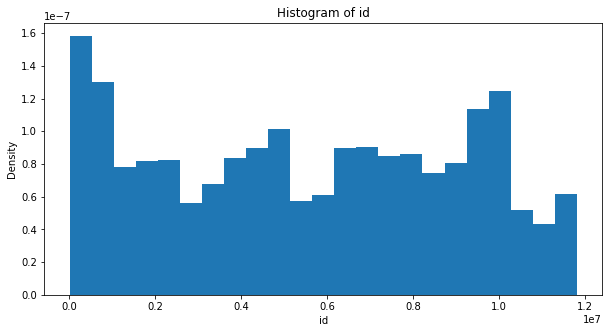

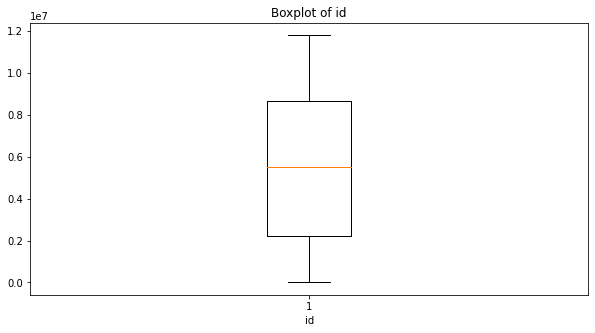

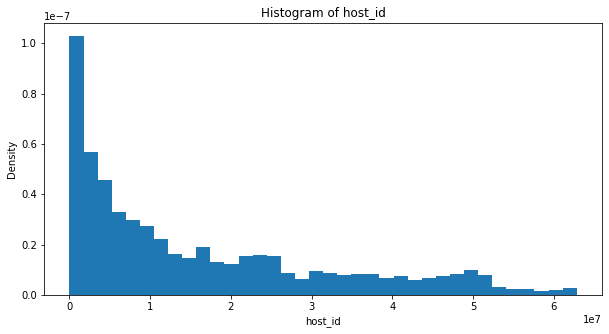

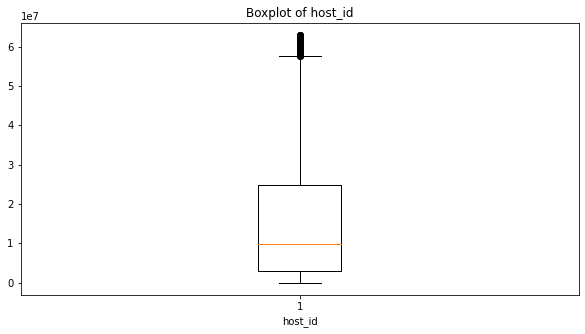

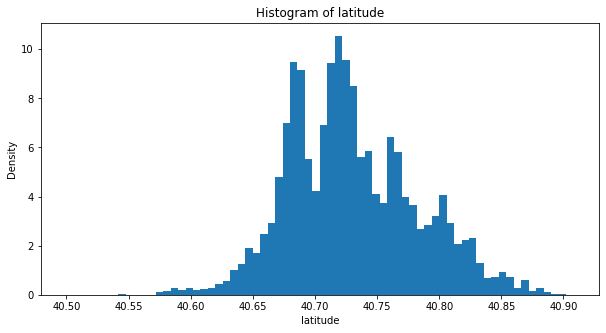

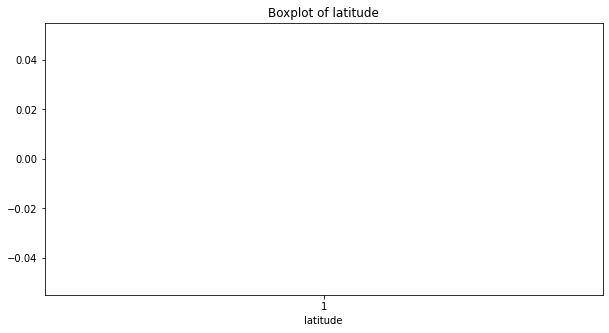

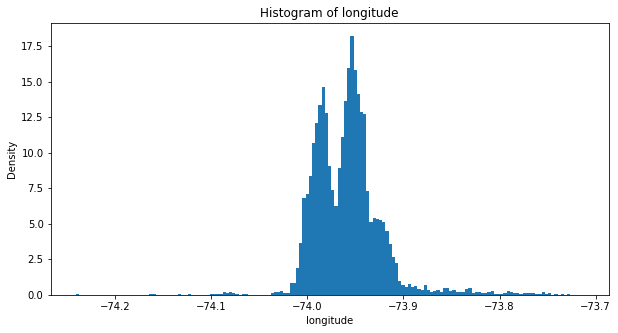

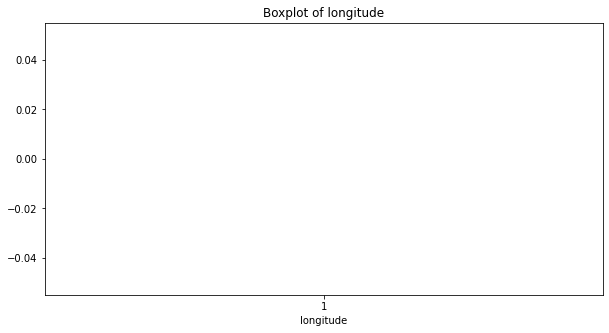

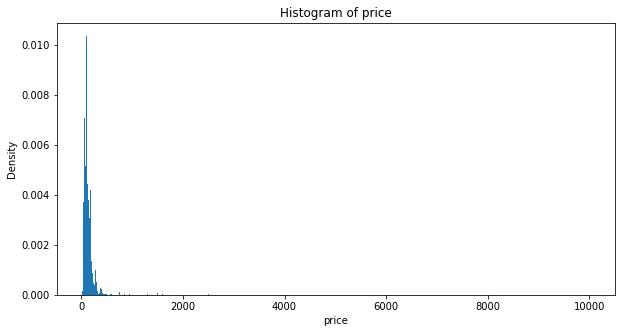

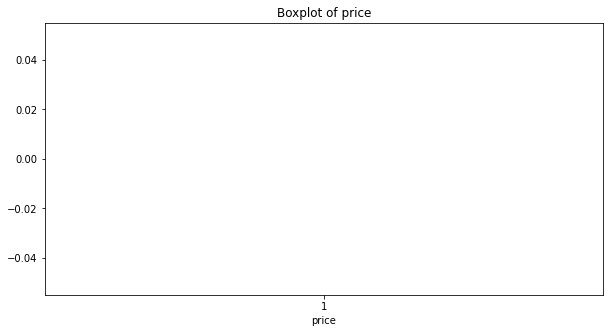

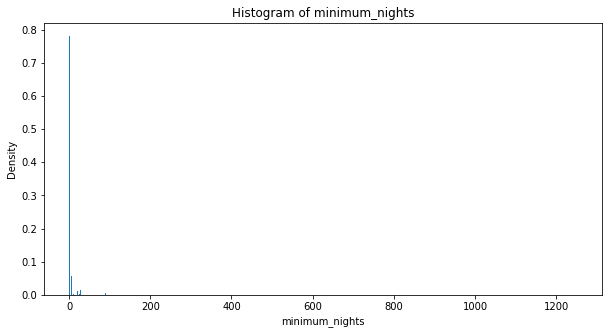

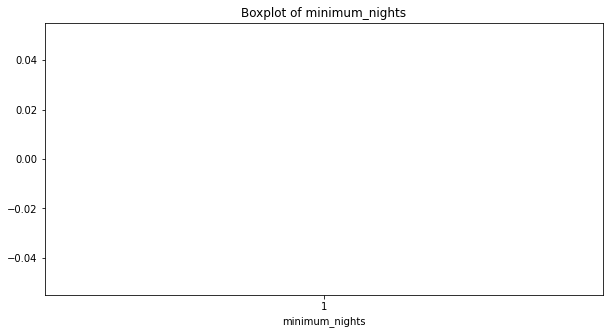

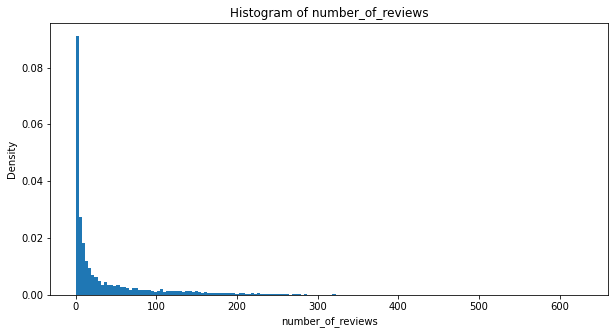

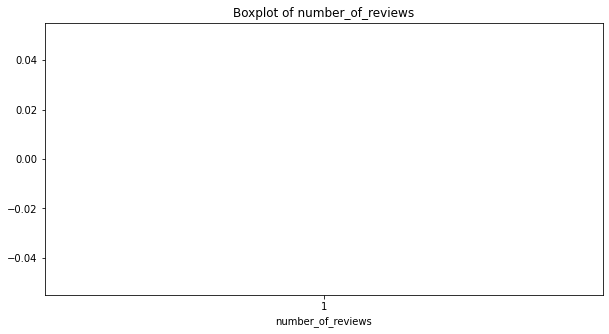

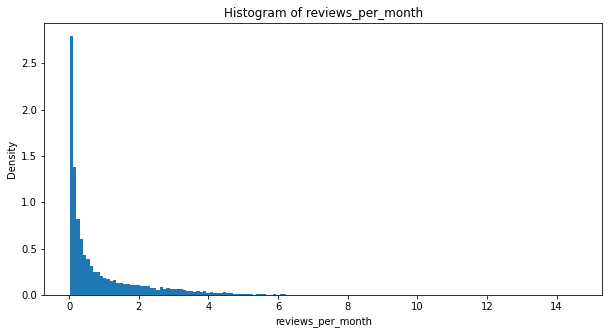

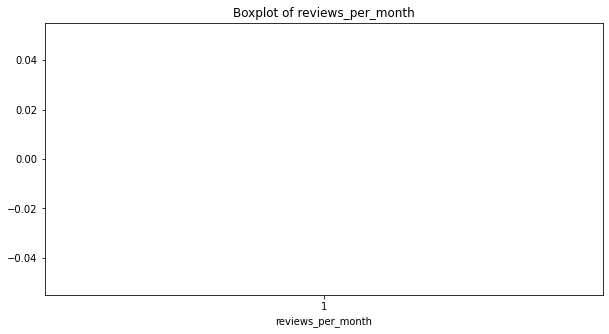

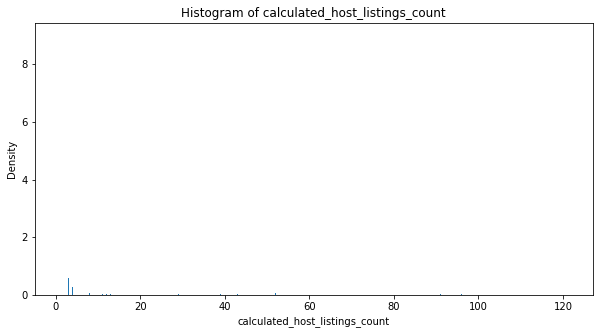

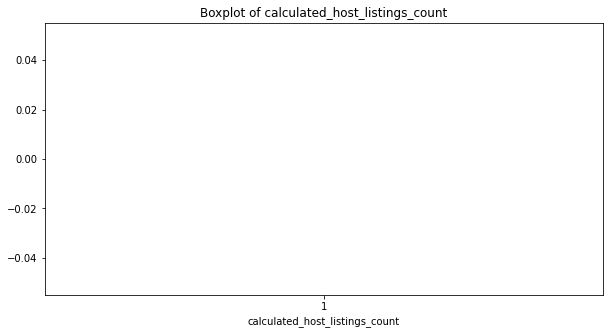

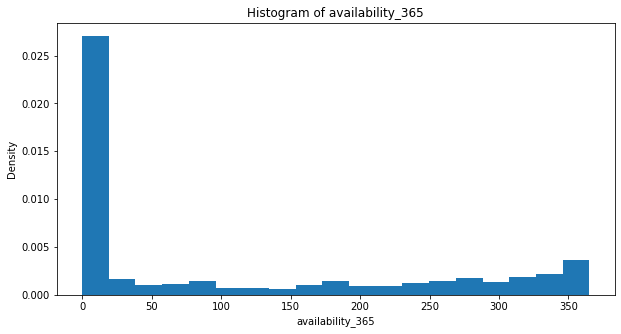

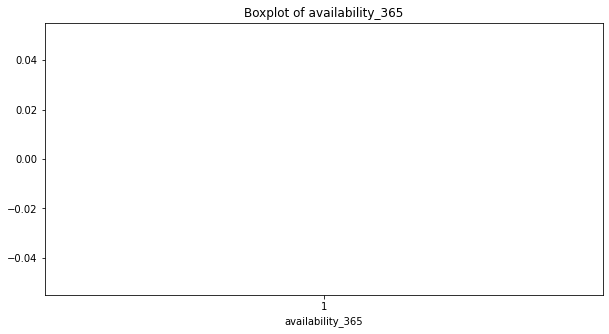

In [7]:
for column in df.columns:
    if df[column].dtype != object:
        plt.figure(figsize=(10,5))
        plt.hist(df[column], bins='auto', density=True)
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Density')
        plt.show()

        plt.figure(figsize=(10,5))
        plt.boxplot(df[column])
        plt.title(f'Boxplot of {column}')
        plt.xlabel(column)
        plt.show()



*   So, features that have Gaussian distribution are:
*   Features that have outliers are: price, minimum_nights, calculated_host_listings_count
*   Features with outliers of concern: price


In [8]:
binary_cols = [col for col in df.columns if len(df[col].unique()) == 2]

# Print the list of columns with binary values
print("Columns with binary values:")
print(binary_cols)

Columns with binary values:
[]


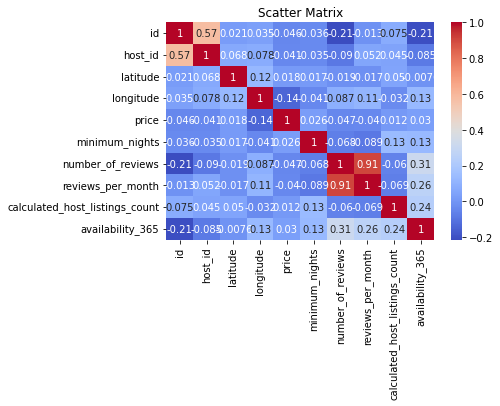

In [10]:
import seaborn as sns
# Create a correlation matrix
corr_matrix = df.corr()

# Plot a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Scatter Matrix')
plt.show()





Positively correlated features:

(latitude, price), (availability, all features except latitude)

Negatively correlated features:

(longitude, price)

Feature engineering:

Features that need Encode:
'neighbourhood_group'
'room_type'

Features that need Aggregate:
- 'price': This feature can be aggregated by calculating the mean or median price for each neighbourhood group.
- 'availability_365': This feature can be aggregated by calculating the mean or median availability for each neighbourhood group.

Features that need Decompose:
- 'last_review': This feature can be decomposed into month, day, and year, which can provide more information for analysis.

Features that need Scale:
- 'price', "minimum_nights", "calculated_host_listings_count", and "availability_365": This feature can be scaled to a smaller range using normalization or standardization.

Features that need Transform:
- The label "price" needs to apply a transformation, such as logarithmic or exponential transformation, to make the variable more normally distributed or to create a more linear relationship with the target variable.
